In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('shop data.csv')
data

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [9]:

x = data.drop(columns =['buys'])
y = data['buys']
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [10]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
x = x.apply(le.fit_transform)
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1, random_state=111)
xtest.shape

(2, 4)

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(xtrain,ytrain)
predict = model.predict(xtest)
predict


array(['yes', 'no'], dtype=object)

# Performance

In [13]:
from sklearn.metrics import accuracy_score

score = accuracy_score(ytest,predict)
score

1.0

In [14]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(ytest,predict)
con

array([[1, 0],
       [0, 1]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
cls = classification_report(ytest,predict)
print(cls)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         1
         yes       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Support Vector Machine

In [17]:
from sklearn.svm import SVC
sv =SVC()
model = sv.fit(xtrain,ytrain)
predict2 = model.predict(xtest)
print(predict2)

['yes' 'yes']


In [18]:
from sklearn.metrics import accuracy_score

score = accuracy_score(ytest,predict2)
score

0.5

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
model = rf_classifier.fit(xtrain, ytrain)
predict = model.predict(xtest)
predict

array(['yes', 'no'], dtype=object)

In [21]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(ytest,predict)
sc

1.0

# Bagging Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)
model = bagging_classifier.fit(xtrain, ytrain)
predict = model.predict(xtest)
predict

array(['yes', 'no'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(ytest,predict)
sc

1.0

# Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
model = gbc.fit(xtrain, ytrain)
predict = model.predict(xtest)
predict

array(['yes', 'no'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(ytest,predict)
sc

1.0

# KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(xtrain, ytrain)
predict = model.predict(xtest)
predict

array(['yes', 'yes'], dtype=object)

In [16]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(ytest,predict)
sc

0.5

# Naieve bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
model = nbc.fit(xtrain, ytrain)
predict = model.predict(xtest)
predict

array(['yes', 'no'], dtype='<U3')

In [19]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(ytest,predict)
sc

1.0

# Visualizing using sea born

<Axes: xlabel='age', ylabel='income'>

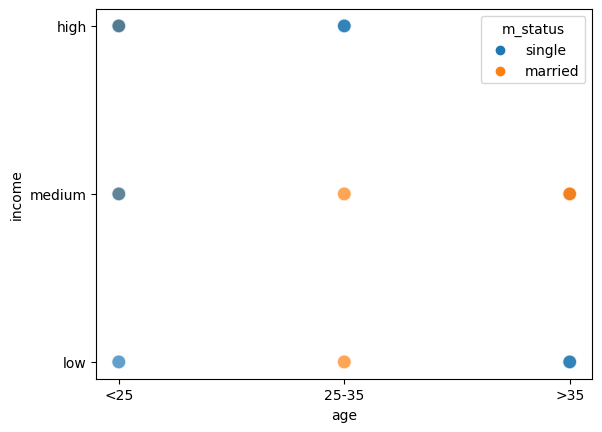

In [21]:
import seaborn as sns

sns.scatterplot(x='age', y='income', data=data,hue="m_status", s=100, alpha=0.7)

Text(0, 0.5, 'Count')

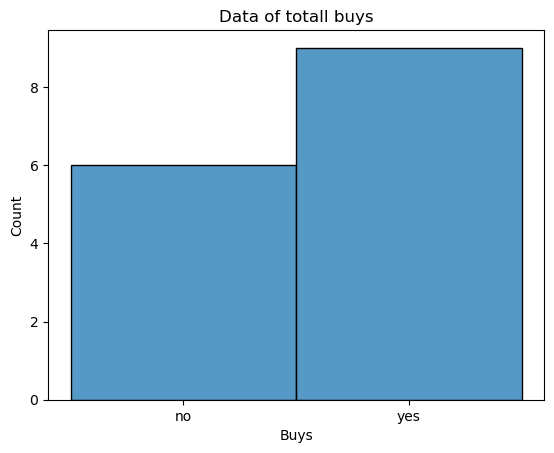

In [22]:
import matplotlib.pyplot as plt
sns.histplot(data=data, x='buys', bins=10)
plt.title("Data of totall buys")
plt.xlabel("Buys")
plt.ylabel("Count")


<Axes: xlabel='age', ylabel='income'>

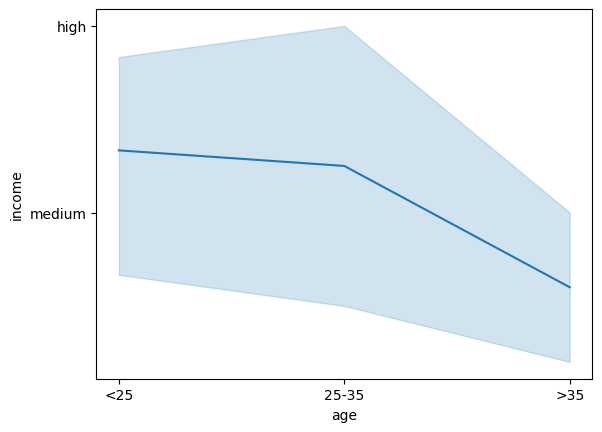

In [23]:
sns.lineplot(x='age', y='income', data=data)


<Axes: >

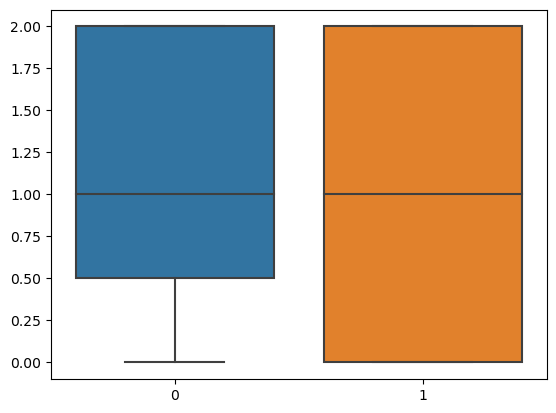

In [30]:
sns.boxplot([x['age'],x['income']])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

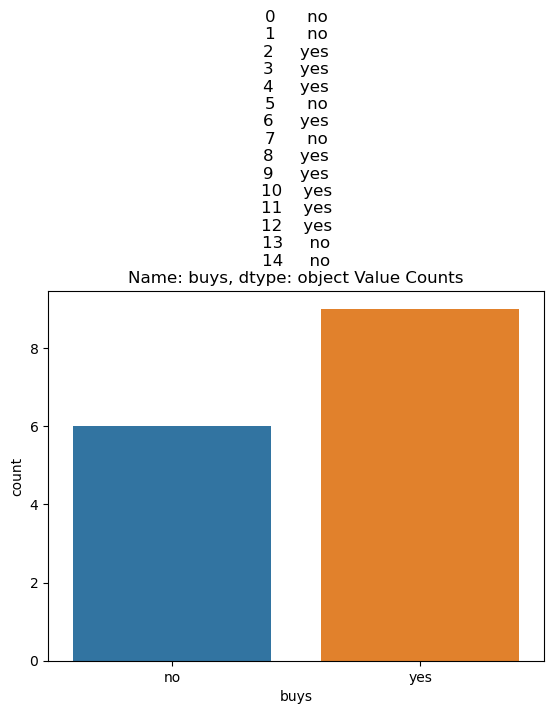

In [31]:
sns.countplot(data=data, x=y)
plt.title(f'{y} Value Counts')
plt.xlabel(y)
plt.ylabel('Count')
plt.show()